<a href="https://colab.research.google.com/github/radar101/SEM-8/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import fashion_mnist

In [4]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(train_x.shape)
print(train_y.shape)

(60000, 28, 28)
(60000,)


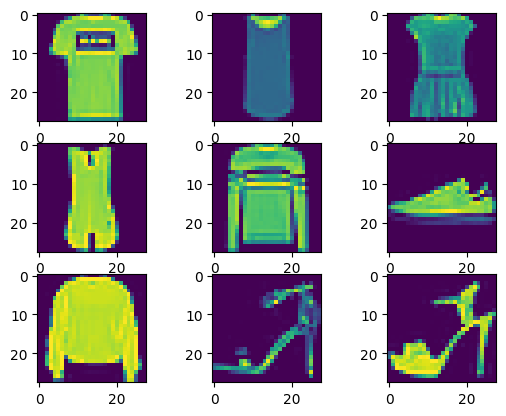

In [8]:
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(train_x[i])
plt.show()

In [10]:
train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

In [11]:
def model_arch():
  model = Sequential()
  model.add(Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model


In [12]:
model = model_arch()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,618,698 (6.17 MB)

 Trainable params: 1,618,698 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs=10, steps_per_epoch=100, validation_split=0.33)

Epoch 1/10
  56/1257 ━━━━━━━━━━━━━━━━━━━━ 7:03 352ms/step - loss: 0.6255 - sparse_categorical_accuracy: 0.7785

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = model.predict(test_x[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(test_x[:1][0])
plt.show()

To make the predictions call the predict() function on the model and pass the image into it. To perform the prediction, we will first create a list of labels in order of the corresponding output layer of the CNN. The predict() function will return the list of values of probabilities that the current input belongs probably belongs to which class. Then by using the argmax(), we will find the highest value and then output the correct label.



Q1: What is the Fashion MNIST dataset?
A: It is a dataset of 28x28 grayscale images of 10 types of clothing items, used for image classification tasks.

Q2: Why do we normalize the pixel values?
A: To scale values between 0 and 1 for better model convergence and stable training.

Q3: What does the Flatten() layer do?
A: It converts the 2D image (28x28) into a 1D vector (784) so it can be fed into dense layers.

Q4: Why do we use softmax in the output layer?
A: Because we are performing multi-class classification and need probabilities across all 10 classes.

Q5: Which loss function is used here and why?
A: sparse_categorical_crossentropy is used because our labels are integers (not one-hot encoded).

Q6: How many parameters does the model have?
A: You can check using model.summary() — it will show total trainable and non-trainable parameters.

Q7: What metrics do we use to evaluate this model?
A: Accuracy on training and test sets, and optionally confusion matrix for detailed class-wise performance.

Q8: Can CNN perform better on this dataset?
A: Yes, CNNs are better suited for image data as they can extract spatial hierarchies and patterns.

Q9: What are some ways to improve this model?
A: Use CNN layers, batch normalization, dropout, data augmentation, and deeper architectures.

Q10: How is this different from original MNIST?
A: Original MNIST contains handwritten digits (0–9), while Fashion MNIST contains clothing categories.

